## Anomaly Detection SOM Experiment

Insert Code wherever represented with "#***************#"

In [4]:

pip install minisom

  Using cached MiniSom-2.3.3-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [5]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
# Minisom library and module is used for performing Self Organizing Maps 
from minisom import MiniSom 

In [6]:
# Loading Data 
data = pd.read_csv('/Users/amanmehra/Downloads/Ml2/ML2_Exp/Credit_Card_Applications.csv') 

# X  
data 

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,15808223,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,15769980,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,0
687,15675450,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,15776494,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [8]:
# Shape of the data: 
""" 
    Write Code to display shape of data
"""
data.shape
#********************#

(690, 16)

In [9]:
# Info of the data: 
""" 
    Write Code to display information of data using inbuilt info function
"""
data.info()
#********************#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  690 non-null    int64  
 1   A1          690 non-null    int64  
 2   A2          690 non-null    float64
 3   A3          690 non-null    float64
 4   A4          690 non-null    int64  
 5   A5          690 non-null    int64  
 6   A6          690 non-null    int64  
 7   A7          690 non-null    float64
 8   A8          690 non-null    int64  
 9   A9          690 non-null    int64  
 10  A10         690 non-null    int64  
 11  A11         690 non-null    int64  
 12  A12         690 non-null    int64  
 13  A13         690 non-null    int64  
 14  A14         690 non-null    int64  
 15  Class       690 non-null    int64  
dtypes: float64(3), int64(13)
memory usage: 86.4 KB


In [11]:
# Defining X variables for the input of SOM 
X = data.iloc[:, 1:14].values 
y = data.iloc[:, -1].values 

# X variables: 
""" 
    Convert X variable into a pandas DataFrame
"""
X = pd.DataFrame(X)
#********************#

In [13]:
from sklearn.preprocessing import MinMaxScaler 

sc = MinMaxScaler(feature_range = (0, 1)) 
""" 
    apply fit_transform using the created MinMaxScaler sc on variable X 
"""
X = sc.fit_transform(X) # Write Code
pd.DataFrame(X) 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.0,0.125263,0.409286,0.5,0.230769,0.375,0.055614,0.0,0.0,0.000000,1.0,0.5,0.05
1,0.0,0.134135,0.250000,0.5,0.538462,0.375,0.005789,0.0,0.0,0.000000,0.0,0.5,0.08
2,0.0,0.238045,0.062500,0.0,0.230769,0.375,0.043860,0.0,0.0,0.000000,1.0,0.5,0.14
3,0.0,0.119098,0.410714,0.0,0.307692,0.250,0.000000,1.0,1.0,0.164179,1.0,0.5,0.00
4,1.0,0.096541,0.291786,0.5,0.384615,0.375,0.068772,1.0,1.0,0.208955,0.0,0.5,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1.0,0.267970,0.375000,0.5,1.000000,0.375,0.228070,1.0,0.0,0.000000,0.0,0.5,0.00
686,1.0,0.104060,0.014821,0.5,0.538462,0.375,0.004386,0.0,0.0,0.000000,0.0,0.5,0.00
687,0.0,0.076391,0.340714,0.5,0.384615,0.375,0.002982,1.0,0.0,0.000000,0.0,0.5,0.05
688,0.0,0.205564,0.517857,0.5,1.000000,0.875,0.108246,1.0,1.0,0.014925,0.0,0.5,0.06


In [14]:
# Set the hyper parameters 
som_grid_rows = 10 
som_grid_columns = 10 
iterations = 20000 
sigma = 1 
learning_rate = 0.5 

# define SOM: 
""" 
    Create MiniSom Model using above hyperparemeters with
    x = som_grid_rows
    y = som_grid_columns
    sigma = sigma
    input_len = 13
    and learning_rate = learning_rate
"""
# Create MiniSom Model using the provided hyperparameters
som = MiniSom(
    x=som_grid_rows, 
    y=som_grid_columns, 
    input_len=13,  # The number of features in your input data
    sigma=sigma, 
    learning_rate=learning_rate
)
# Declare MiniSom Model 

In [15]:
# Initializing the weights 
som.random_weights_init(X) 

# Training 
"""
    Train som model using train_random on varible X for above mentioned iterations
"""
som.train_random(data=X, num_iteration=iterations)
#********************#
 
# Returns the distance map from the weights: 
som.distance_map() 

array([[0.17078384, 0.30823071, 0.41873995, 0.36507565, 0.34640606,
        0.4409216 , 0.40992461, 0.38412561, 0.47269515, 0.23686913],
       [0.3829823 , 0.50982215, 0.58800127, 0.56263993, 0.52328157,
        0.96085026, 0.65484836, 0.67371733, 0.8174939 , 0.46193493],
       [0.26557402, 0.613488  , 0.63417249, 0.57926722, 0.72312444,
        0.68620512, 0.76490455, 0.61033224, 0.7194178 , 0.31893315],
       [0.41794949, 0.7293467 , 0.76342202, 0.63564823, 0.66002935,
        0.81697136, 0.48727066, 0.63385722, 0.56026603, 0.40550268],
       [0.41916225, 0.70894028, 0.76144408, 0.55144777, 0.76542468,
        0.8017291 , 0.57146905, 0.55965776, 0.72507295, 0.39446766],
       [0.31961629, 0.54654404, 0.54335896, 0.6233538 , 0.76802304,
        0.63450331, 0.64534959, 0.73341751, 0.59783641, 0.30345104],
       [0.34196075, 0.5871566 , 0.57071033, 1.        , 0.73073591,
        0.790061  , 0.67349425, 0.84797339, 0.84473016, 0.4857716 ],
       [0.45526613, 0.5584939 , 0.6402105

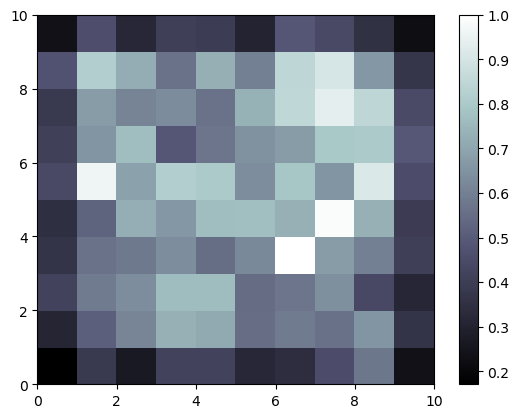

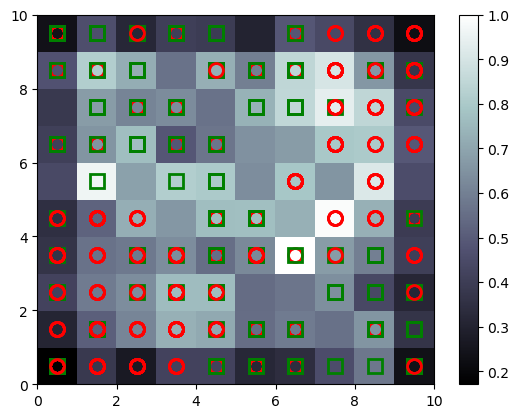

In [16]:
from pylab import plot, axis, show, pcolor, colorbar, bone 

bone() 
pcolor(som.distance_map().T)       # Distance map as background 
colorbar() 
show() 
bone() 
pcolor(som.distance_map().T) 
colorbar() #gives legend 

markers = ['o', 's']                 # if the observation is fraud then red circular color or else green square 
colors = ['r', 'g'] 

for i, x in enumerate(X): 
    w = som.winner(x) 
    plot(w[0] + 0.5, 
         w[1] + 0.5, 
         markers[y[i]], 
         markeredgecolor = colors[y[i]], 
         markerfacecolor = 'None', 
         markersize = 10, 
         markeredgewidth = 2) 

show() 

In [17]:
"""
    Write code to store som win_map into a variable names mappings
"""
mappings = som.win_map(X) #********************#
mappings 
mappings.keys() 
"""
    Write code to find the length of mapping.keys()
"""
# Find the length of mapping keys
length_of_keys = len(mappings.keys())
print(f"Length of mapping keys: {length_of_keys}")
#********************#

Length of mapping keys: 84


In [18]:
mappings[(9,8)] 
frauds = np.concatenate((mappings[(0,9)], mappings[(8,9)]), axis = 0) 
frauds 

array([[0.        , 0.08150376, 0.02089286, 0.        , 0.38461538,
        0.375     , 0.02052632, 1.        , 0.        , 0.        ,
        1.        , 0.5       , 0.08      ],
       [0.        , 0.54255639, 0.48517857, 0.5       , 0.23076923,
        0.875     , 0.29824561, 1.        , 0.        , 0.        ,
        1.        , 0.5       , 0.        ],
       [0.        , 0.22300752, 0.12642857, 0.5       , 0.15384615,
        0.5       , 0.01754386, 1.        , 0.        , 0.        ,
        1.        , 0.5       , 0.0855    ],
       [0.        , 0.17037594, 0.09071429, 0.        , 0.38461538,
        0.375     , 0.00877193, 1.        , 0.        , 0.        ,
        1.        , 0.5       , 0.185     ],
       [0.        , 0.65157895, 0.01196429, 0.5       , 0.15384615,
        0.5       , 0.03508772, 1.        , 0.        , 0.        ,
        1.        , 0.5       , 0.126     ],
       [0.        , 0.53007519, 0.05357143, 0.5       , 0.30769231,
        0.25      , 0.     

In [19]:
# the list of customers who are frauds: 
"""
    Convert he fraud customers back into original values using Standard Scaler(sc) inverse_transform and store into a variable named frauds1
"""
frauds1 = sc.inverse_transform(frauds)
#********************#
pd.DataFrame(frauds1) 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,19.17,0.585,1.0,6.0,4.0,0.585,1.0,0.0,0.0,1.0,2.0,160.0
1,0.0,49.83,13.585,2.0,4.0,8.0,8.500,1.0,0.0,0.0,1.0,2.0,0.0
2,0.0,28.58,3.540,2.0,3.0,5.0,0.500,1.0,0.0,0.0,1.0,2.0,171.0
3,0.0,25.08,2.540,1.0,6.0,4.0,0.250,1.0,0.0,0.0,1.0,2.0,370.0
4,0.0,57.08,0.335,2.0,3.0,5.0,1.000,1.0,0.0,0.0,1.0,2.0,252.0
5,0.0,49.00,1.500,2.0,5.0,3.0,0.000,1.0,0.0,0.0,1.0,2.0,100.0
6,0.0,17.58,9.000,2.0,6.0,4.0,1.375,1.0,0.0,0.0,1.0,2.0,0.0
7,0.0,31.57,3.500,2.0,2.0,4.0,3.000,1.0,0.0,0.0,1.0,2.0,300.0
8,0.0,41.33,1.000,2.0,3.0,5.0,2.250,1.0,0.0,0.0,1.0,2.0,0.0
9,0.0,38.25,6.000,2.0,4.0,4.0,1.000,1.0,0.0,0.0,1.0,2.0,0.0
